In [1]:
from knight import *

In [4]:
def max_search(s):
    return max(max(x) for x in s)

In [6]:
max_search(search(100, 100))

68

In [7]:
import pandas as pd

In [11]:
board_size = list(range(8, 100))
knights = [(a, b) for b in range(1, 20) for a in range(1, b)]

In [30]:
vals = []
for sz in board_size:
    for a, b in knights:
        if a >= sz or b >= sz:
            continue
        m = max_search(search(sz, sz, (a,b)))
        vals.append([sz, a, b, m])
data = pd.DataFrame(vals, columns=["board_size", "knight_a", "knight_b", "max_bfs"])
data.to_csv("knight_data.csv")

8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [41]:
from sklearn.linear_model import LinearRegression
X, y = data[["board_size", "knight_a", "knight_b"]], data["max_bfs"]
reg = LinearRegression().fit(X, y)
reg.score(X, y), reg.coef_

(0.16930903795480223, array([0.09988621, 0.2810874 , 0.55735544]))

In [42]:
data.shape

(14097, 4)

In [56]:
%matplotlib inline
data[data["board_size"] == 25]["max_bfs"].idxmax()

1916

In [60]:
data[data["board_size"] == 25].loc[1916]

board_size    25
knight_a       8
knight_b      17
max_bfs       77
Name: 1916, dtype: int64

In [ ]:
search(25, 25, (8, 17))

In [2]:
b = new_board(8, 8)
k = (2,5)
moves = all_moves(k)
valid = move_valid(8, 8)
b

[[0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0]]

In [10]:
def transform(board, old, new):
    for r in range(len(board)):
        for c in range(len(board[r])):
            if board[r][c] == old:
                board[r][c] = new

In [21]:
def tour_search():
    num_groups = 1
    groups = {}
    for r in range(8):
        for c in range(8):
            next_moves = [m for m in [make_move((r, c), m) for m in moves] if valid(m)]
            if len(next_moves) != 2:
                continue
            if not b[r][c]:
                b[r][c] = num_groups
                groups[num_groups] = [(r, c)]
                num_groups += 1
            nextr, nextc = next_moves[0]
            if b[nextr][nextc]:
                
            for nextr, nextc in next_moves:
                if b[nextr][nextc]:
                    transform(b, b[nextr][nextc], b[r][c])
                else:
                    b[nextr][nextc] = b[r][c]
            yield groups

In [3]:
for r in range(8):
    for c in range(8):
        b[r][c] = len([m for m in [make_move((r, c), m) for m in moves] if valid(m)])

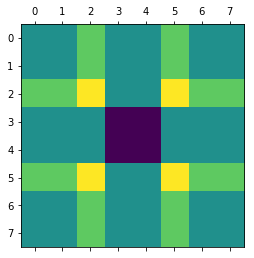

In [5]:
from matplotlib import pyplot
%matplotlib inline
pyplot.matshow(b)

In [23]:
x = tour_search()

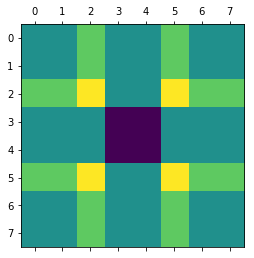

In [6]:
pyplot.matshow(b)

In [27]:
def rotate(x, t = 0):
    if t == 0:
        return x
    r, c = x
    return rotate((c, 7-r), t-1)
def reflect(x):
    r, c = x
    return (c, r)
def reverse(x):
    return [list(reversed(x0)) for x0 in x]

In [40]:
x0 = [(2,5),(0,0),(5,2)]
x = [[rotate(x, i) for x in x0] for i in range(4)]
y0 = [(5,1),(3,6),(1,1),(6,3),(1,5)]
y = [[rotate(y, i) for y in y0] for i in range(4)]
z0 = [(2,6), (0,1), (5,3),(0,5)]
z1 = [reflect(z) for z in z0]
z = [[[rotate(z, i) for z in z0] for i in range(4)],
     [[rotate(z, i) for z in z1] for i in range(4)]]
w0 = [(5,1),(0,3),(5,5)]
w1 = [reflect(w) for w in w0]
w = [[[rotate(w, i) for w in w0] for i in range(4)],
     [[rotate(w, i) for w in w1] for i in range(4)]]
v0 = [(0,5), (5,7)]
v1 = [reflect(v) for v in v0]
v = [[[rotate(v, i) for v in v0] for i in range(4)],
     [[rotate(v, i) for v in v1] for i in range(4)]]

In [28]:
reverse(z[0])

[[(0, 5), (5, 3), (0, 1), (2, 6)],
 [(5, 7), (3, 2), (1, 7), (6, 5)],
 [(7, 2), (2, 4), (7, 6), (5, 1)],
 [(2, 0), (4, 5), (6, 0), (1, 2)]]

In [29]:
w[0]

[[(5, 1), (0, 3), (5, 5)],
 [(1, 2), (3, 7), (5, 2)],
 [(2, 6), (7, 4), (2, 2)],
 [(6, 5), (4, 0), (2, 5)]]

In [30]:
x

[[(2, 5), (0, 0), (5, 2)],
 [(5, 5), (0, 7), (2, 2)],
 [(5, 2), (7, 7), (2, 5)],
 [(2, 2), (7, 0), (5, 5)]]

In [31]:
reverse(w[0])

[[(5, 5), (0, 3), (5, 1)],
 [(5, 2), (3, 7), (1, 2)],
 [(2, 2), (7, 4), (2, 6)],
 [(2, 5), (4, 0), (6, 5)]]

In [32]:
y

[[(5, 1), (3, 6), (1, 1), (6, 3), (1, 5)],
 [(1, 2), (6, 4), (1, 6), (3, 1), (5, 6)],
 [(2, 6), (4, 1), (6, 6), (1, 4), (6, 2)],
 [(6, 5), (1, 3), (6, 1), (4, 6), (2, 1)]]

In [33]:
z[1]

[[(6, 2), (1, 0), (3, 5), (5, 0)],
 [(2, 1), (0, 6), (5, 4), (0, 2)],
 [(1, 5), (6, 7), (4, 2), (2, 7)],
 [(5, 6), (7, 1), (2, 3), (7, 5)]]

In [41]:
v[1]

[[(5, 0), (7, 5)], [(0, 2), (5, 0)], [(2, 7), (0, 2)], [(7, 5), (2, 7)]]

In [34]:
reverse(z[1])

[[(5, 0), (3, 5), (1, 0), (6, 2)],
 [(0, 2), (5, 4), (0, 6), (2, 1)],
 [(2, 7), (4, 2), (6, 7), (1, 5)],
 [(7, 5), (2, 3), (7, 1), (5, 6)]]

In [35]:
w[1]

[[(1, 5), (3, 0), (5, 5)],
 [(5, 6), (0, 4), (5, 2)],
 [(6, 2), (4, 7), (2, 2)],
 [(2, 1), (7, 3), (2, 5)]]

In [36]:
x

[[(2, 5), (0, 0), (5, 2)],
 [(5, 5), (0, 7), (2, 2)],
 [(5, 2), (7, 7), (2, 5)],
 [(2, 2), (7, 0), (5, 5)]]

In [37]:
reverse(w[1])

[[(5, 5), (3, 0), (1, 5)],
 [(5, 2), (0, 4), (5, 6)],
 [(2, 2), (4, 7), (6, 2)],
 [(2, 5), (7, 3), (2, 1)]]

In [38]:
reverse(y)

[[(1, 5), (6, 3), (1, 1), (3, 6), (5, 1)],
 [(5, 6), (3, 1), (1, 6), (6, 4), (1, 2)],
 [(6, 2), (1, 4), (6, 6), (4, 1), (2, 6)],
 [(2, 1), (4, 6), (6, 1), (1, 3), (6, 5)]]

In [39]:
z[0]

[[(2, 6), (0, 1), (5, 3), (0, 5)],
 [(6, 5), (1, 7), (3, 2), (5, 7)],
 [(5, 1), (7, 6), (2, 4), (7, 2)],
 [(1, 2), (6, 0), (4, 5), (2, 0)]]

In [42]:
v[0]

[[(0, 5), (5, 7)], [(5, 7), (7, 2)], [(7, 2), (2, 0)], [(2, 0), (0, 5)]]

In [43]:

def stitch(l1, l2):
    stitched = []
    for subl1 in l1:
        for subl2 in l2:
            if subl1[-1] == subl2[0]:
                stitched.append(subl1 + subl2[1:])
    return stitched

In [44]:
stitch(reverse(z[0]), w[0])

[[(0, 5), (5, 3), (0, 1), (2, 6), (7, 4), (2, 2)],
 [(5, 7), (3, 2), (1, 7), (6, 5), (4, 0), (2, 5)],
 [(7, 2), (2, 4), (7, 6), (5, 1), (0, 3), (5, 5)],
 [(2, 0), (4, 5), (6, 0), (1, 2), (3, 7), (5, 2)]]

In [46]:
from functools import reduce

In [54]:
steps = reduce(stitch, [reverse(z[0]), w[0], x, reverse(w[0]), y, z[1], v[1], reverse(z[1]), w[1], x, reverse(w[1]), reverse(y), z[0]])

In [63]:
steps_all = steps[0] + steps[3][1:] + steps[2][1:] + steps[1][1:]

In [301]:
def run_steps(steps):
    board = new_board(8,8)
    for r,c in steps:
        board[r][c] += 1
    return board

In [302]:
b = run_steps(steps_all)

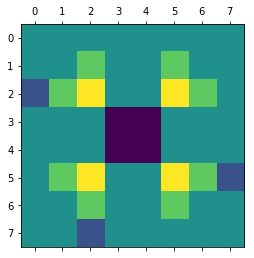

In [304]:
pyplot.matshow(b)

In [167]:
len(steps_all)

133